<a href="https://colab.research.google.com/github/Sukesh-bitragunta/Sukesh_Data690/blob/main/inclass_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
random.randint(1,6)

1

In [3]:
np.random.choice(["A","B","C"], p=[0.25,0.25,0.50])

'B'

In [4]:
team_count = {
    "A":0,
    "B":0,
    "C":0
}

for i in range(1000):
    team_picked = np.random.choice(["A","B","C"], p=[0.25,0.25,0.50])
    team_count[team_picked] += 1

print(team_count)

{'A': 241, 'B': 268, 'C': 491}


In [5]:
pair_dict = {(i,j): i+j for i in range(1,7) for j in range(1,7)}
pair_dict

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

In [6]:
len(pair_dict)

36

In [7]:
df = pd.DataFrame(data=pair_dict.items(), columns=["Pair", "Pair_Sum"])
df

,Pair,Pair_Sum
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6
5,"(1, 6)",7
6,"(2, 1)",3
7,"(2, 2)",4
8,"(2, 3)",5
9,"(2, 4)",6


In [8]:
df["Pair"] = df["Pair"].astype(str)
df.head()

,Pair,Pair_Sum
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6


In [9]:
name_list = ["jay", "john", "jerry", "jack"]

", ".join(name_list)

'jay, john, jerry, jack'

In [10]:
df_agg = df.groupby("Pair_Sum").agg(
    Pair_List=pd.NamedAgg(column="Pair", aggfunc=", ".join),
    Pair_Count=pd.NamedAgg(column="Pair", aggfunc="count")
).reset_index()

df_agg

,Pair_Sum,Pair_List,Pair_Count
0,2,"(1, 1)",1
1,3,"(1, 2), (2, 1)",2
2,4,"(1, 3), (2, 2), (3, 1)",3
3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4
4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5
5,7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6
6,8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5
7,9,"(3, 6), (4, 5), (5, 4), (6, 3)",4
8,10,"(4, 6), (5, 5), (6, 4)",3
9,11,"(5, 6), (6, 5)",2


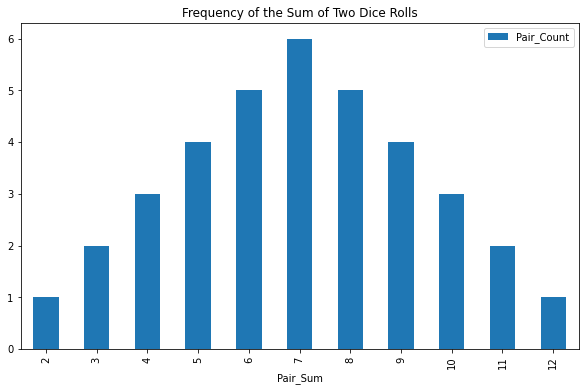

In [11]:
df_agg.plot.bar(x="Pair_Sum", y="Pair_Count", figsize=(10,6), title="Frequency of the Sum of Two Dice Rolls")

In [12]:
fig = px.bar(df_agg, x="Pair_Sum", y="Pair_Count", title="Frequency of the Sum of Two Dice Rolls")
fig.show()

In [13]:
total_count = df_agg["Pair_Count"].sum()
df_agg["Probability(%)"] = round(100 * df_agg["Pair_Count"] / total_count, 2)
df_agg

,Pair_Sum,Pair_List,Pair_Count,Probability(%)
0,2,"(1, 1)",1,2.78
1,3,"(1, 2), (2, 1)",2,5.56
2,4,"(1, 3), (2, 2), (3, 1)",3,8.33
3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4,11.11
4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5,13.89
5,7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6,16.67
6,8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5,13.89
7,9,"(3, 6), (4, 5), (5, 4), (6, 3)",4,11.11
8,10,"(4, 6), (5, 5), (6, 4)",3,8.33
9,11,"(5, 6), (6, 5)",2,5.56


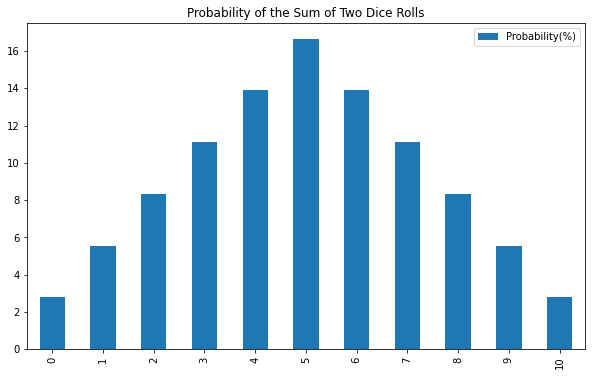

In [14]:
df_agg.plot.bar(y="Probability(%)", figsize=(10,6), title="Probability of the Sum of Two Dice Rolls")

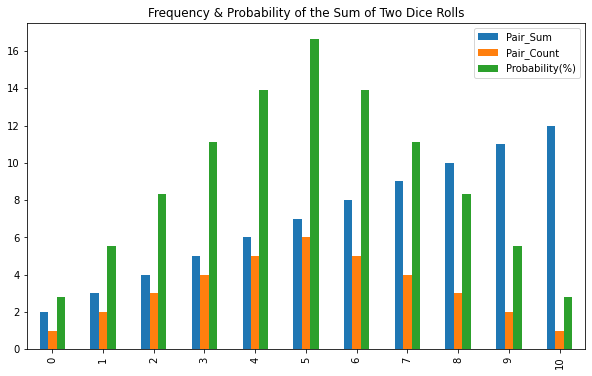

In [15]:
df_agg.plot.bar(figsize=(10,6), title="Frequency & Probability of the Sum of Two Dice Rolls")

Text(0, 0.5, 'Probability')

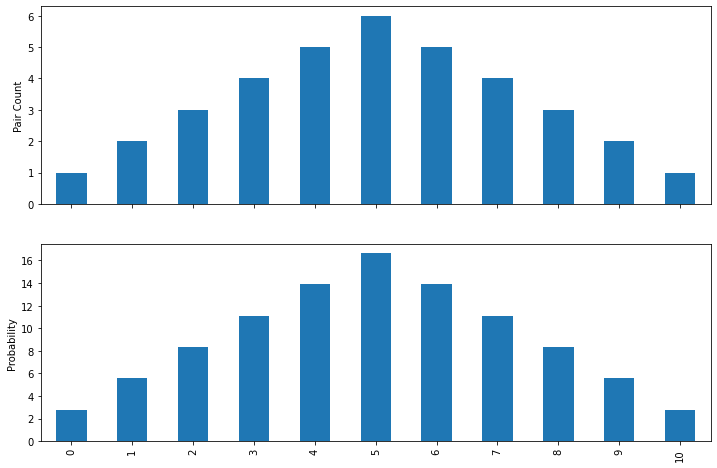

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

df_agg["Pair_Count"].plot.bar(ax=ax1)
ax1.set_ylabel("Pair Count")

df_agg["Probability(%)"].plot.bar(ax=ax2)
ax2.set_ylabel("Probability")

In [17]:
sum_list = []

for i in range(1000):
    sum_list.append(random.randint(1,6) + random.randint(1,6))

sum_list[:20]

[10, 10, 7, 9, 2, 12, 9, 5, 12, 7, 4, 6, 11, 10, 12, 5, 8, 4, 5, 8]

In [18]:
unique_list = set(sum_list)
unique_list

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [19]:
frequency = [sum_list.count(x) for x in unique_list]
frequency

[30, 64, 67, 116, 145, 162, 145, 102, 89, 47, 33]

In [20]:
def simulate(N):
    sum_list = []
    for i in range(N):
        sum_list.append(random.randint(1,6) + random.randint(1,6))
    unique_list = set(sum_list)
    frequency = [sum_list.count(x) for x in unique_list]
    df_agg[f"Exp_{N}"] = [round(100 * x/N, 2) for x in frequency] 

In [21]:
for n in range(100000, 1000000, 200000):
    simulate(n)
    
df_agg

,Pair_Sum,Pair_List,Pair_Count,Probability(%),Exp_100000,Exp_300000,Exp_500000,Exp_700000,Exp_900000
0,2,"(1, 1)",1,2.78,2.71,2.76,2.76,2.78,2.77
1,3,"(1, 2), (2, 1)",2,5.56,5.52,5.60,5.55,5.57,5.60
2,4,"(1, 3), (2, 2), (3, 1)",3,8.33,8.29,8.34,8.36,8.35,8.34
3,5,"(1, 4), (2, 3), (3, 2), (4, 1)",4,11.11,11.03,11.12,11.14,11.07,11.05
4,6,"(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)",5,13.89,14.11,13.89,13.84,13.90,13.90
5,7,"(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)",6,16.67,16.60,16.70,16.70,16.62,16.60
6,8,"(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)",5,13.89,13.94,13.89,13.84,13.91,13.90
7,9,"(3, 6), (4, 5), (5, 4), (6, 3)",4,11.11,10.97,11.12,11.10,11.08,11.14
8,10,"(4, 6), (5, 5), (6, 4)",3,8.33,8.37,8.29,8.36,8.34,8.32
9,11,"(5, 6), (6, 5)",2,5.56,5.68,5.53,5.58,5.58,5.61


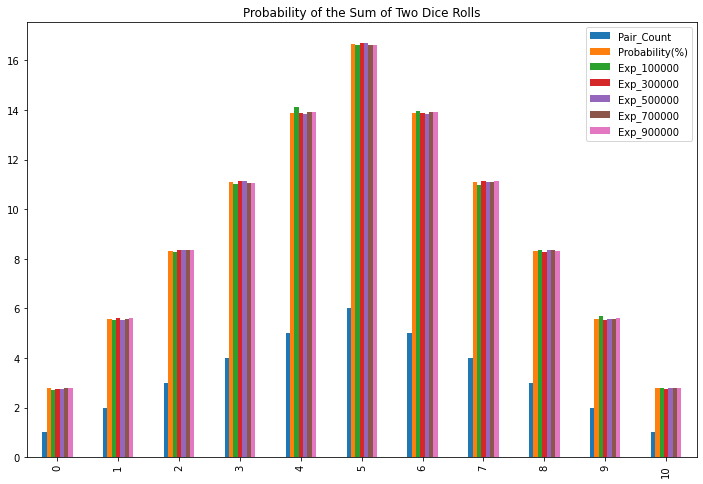

In [22]:
df_agg.iloc[:,2:].plot.bar(figsize=(12,8), title="Probability of the Sum of Two Dice Rolls")